In [ ]:
# %load_ext autoreload
# %autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sys
sys.path.append('../')

from src.viz import plot_trajectories
from src.io import load_dataframe, save_dataframe
from src.preprocessing import (compute_phases,split_trajectories,filter_trajectories,smooth_trajectory_savgol)

In [3]:
df_raw = pd.read_parquet("../data/toy_model/raw/helix_and_straight_lines.parquet")
df_raw.head()

,x,y,z,label,frame
0,3.000000,0.000000,0.000000,0,0
1,2.828128,1.000846,0.108269,0,1
2,2.332205,1.887014,0.216537,0,2
3,1.569054,2.556965,0.324806,0,3
4,0.626119,2.933935,0.433075,0,4


In [ ]:
#for _, values in df_raw.groupby("label"):
#    print(values.shape)
#select the 0th trajectory
df0 = df_raw[df_raw['label'] == 0]
df0.shape

(1000, 5)

In [37]:
df0_raw = df_raw[df_raw['label'] == 0]

print(df_raw.shape)
df1 = filter_trajectories(df_raw,min_length=100,groupby='label')
print(df1.shape)

df1 = smooth_trajectory_savgol(df1,
                            columns=['x','y','z'],
                            window=5,
                            polyorder=3,
                            groupby='label') 
print(df1.shape)

df2 = compute_phases(df1, column_names=['x','y','z'], dt=1,groupby = 'label')
print(df2.shape)

df3 = split_trajectories(df2,chunk_size=997,groupby='label',sort_values="frame")
print(df3.shape)

df03 = df3[df3['label'] == 1]

(1000000, 5)
(1000000, 5)
(1000000, 5)
(997000, 9)
(997000, 9)


In [38]:
print(df0_raw.head())
print(df03.head())

          x         y         z  label  frame
0  3.000000  0.000000  0.000000      0      0
1  2.828128  1.000846  0.108269      0      1
2  2.332205  1.887014  0.216537      0      2
3  1.569054  2.556965  0.324806      0      3
4  0.626119  2.933935  0.433075      0      4
          x         y         z  label  frame     speed  curvature_angle  \
0  2.829878  1.002262  0.108269      1      1  1.021470         0.346036   
1  2.329580  1.884890  0.216537      1      2  1.020218         0.332763   
2  1.567289  2.554087  0.324806      1      3  1.020115         0.338196   
3  0.625415  2.930633  0.433075      1      4  1.020115         0.338196   
4 -0.388120  2.971383  0.541343      1      5  1.020115         0.338196   

   torsion_angle  abs_torsion_angle  
0       0.035931           0.035931  
1       0.036084           0.036084  
2       0.036448           0.036448  
3       0.036448           0.036448  
4       0.036448           0.036448  


(0.0, 5.0)

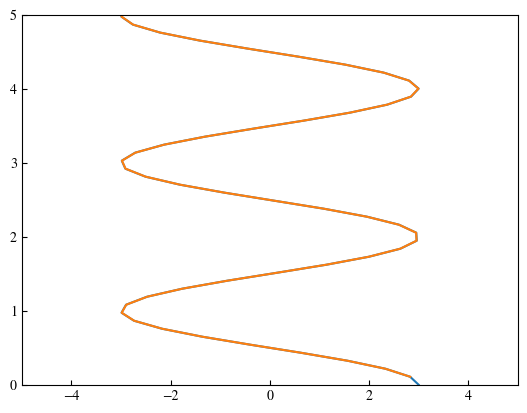

In [40]:
plt.plot(df0_raw['x'],df0_raw['z'])
plt.plot(df03['x'],df03['z'])
plt.xlim(-5,5)
plt.ylim(0,5)